# The code extracts product reviews, processes and maps data like product consumption, gender, and sentiment, cleans duplicates, visualizes keyword frequency, gender distribution, and sentiment analysis. It filters specific product reviews, performs sentiment analysis, and generates plots for insights.

# Extracting Ingredient List and Individual Product URLs


In [65]:
df_ingredients_and_URLs

,product_name,ingredients_list,URL
0,vanilla-coffee-creamer,"Plant Milk (Water, Lentil Protein), Sugar, Ca...",https://www.violife.com/en-us/products/dairy-f...
1,original-coffee-creamer,"Plant Milk (Water, Lentil Protein), Sugar, Ca...",https://www.violife.com/en-us/products/dairy-f...
2,caramel-coffee-creamer,"Plant Milk (Water, Lentil Protein), Sugar, Ca...",https://www.violife.com/en-us/products/dairy-f...
3,just-like-shaved-parmesan,"Filtered water, Modified potato starch, Potato...",https://www.violife.com/en-us/products/dairy-f...
4,just-like-cheddar-shreds,"Water, Coconut oil, Modified tapioca & potato...",https://www.violife.com/en-us/products/dairy-f...
5,just-like-mozzarella-shreds,"Water, Coconut oil, Modified tapioca & potato...",https://www.violife.com/en-us/products/dairy-f...
6,just-like-colby-jack-shreds,"Filtered Water, Coconut Oil, Food Starch-Modi...",https://www.violife.com/en-us/products/dairy-f...
7,mexican-style-shreds,"Filtered Water, Coconut Oil, Food Starch-Modi...",https://www.violife.com/en-us/products/dairy-f...
8,just-like-mature-cheddar-slices,"Filtered Water, Coconut Oil, Food Starch-Modi...",https://www.violife.com/en-us/products/dairy-f...
9,just-like-cheddar-slices,"Filtered Water, Coconut Oil, Food Starch-Modi...",https://www.violife.com/en-us/products/dairy-f...


In [61]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse, urljoin

# Define the URL
url = "https://www.violife.com/en-us/products"

# Fetch the webpage content
response = requests.get(url)
if response.status_code == 200:
    page_content = response.text
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
    exit()

# Parse the HTML content
soup = BeautifulSoup(page_content, 'html.parser')

# Find all <a> tags with href attributes
product_links = soup.find_all('a', href=True)

# Initialize a list to store the modified URLs
modified_urls = []

# Extract and modify the href attributes containing at least 4 "/" in the path
for link in product_links:
    href = link.get('href')
    parsed_href = urlparse(href)
    
    # Check if 'products' is in the URL path and it has at least 4 "/"
    if 'products' in parsed_href.path and parsed_href.path.count('/') >= 4:
        # Join the base URL with the relative URL and add to the list
        full_url = urljoin(url, href)
        modified_urls.append(full_url)

# Print or use the modified URLs as needed
for url in modified_urls:
    print(url)
    
    
    
    
    
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlparse

# List of URLs from which to extract ingredients


# Function to extract ingredients from a given product URL
def extract_ingredients(url):
    try:
        # Send a GET request to the URL
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for HTTP errors

        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the div with class "field-nutritionalfacts" and extract the text inside <p> tags
        nutritionalfacts_div = soup.find('div', class_='field-nutritionalfacts')

        if nutritionalfacts_div:
            # Extract all <p> tags under the div
            paragraphs = nutritionalfacts_div.find_all('p')
            
            # Combine all paragraphs' text into a single string
            ingredients = ' '.join([p.get_text(strip=True) for p in paragraphs])
            
            return ingredients
        else:
            return "Nutritional facts section not found on the page."

    except requests.exceptions.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None

# Initialize an empty list to store the extracted data
data = []

# Iterate over the modified URLs and extract ingredients
for url in modified_urls:
    print(f"Extracting data from: {url}")
    product_name = url.split('/')[-1]  # Extract product name from URL
    ingredients = extract_ingredients(url)
    
    if ingredients:
        # Append extracted data to the list
        data.append({'product_name': product_name, 'ingredients_list': ingredients, 'URL': url})
    else:
        # If extraction fails, append None values
        data.append({'product_name': product_name, 'ingredients_list': None, 'URL': url})

# Create a DataFrame from the collected data
df_ingredients_and_URLs = pd.DataFrame(data)

# Print or use the DataFrame as needed
print(df_ingredients_and_URLs)



https://www.violife.com/en-us/products/dairy-free-coffee-creamers/vanilla-coffee-creamer
https://www.violife.com/en-us/products/dairy-free-coffee-creamers/original-coffee-creamer
https://www.violife.com/en-us/products/dairy-free-coffee-creamers/caramel-coffee-creamer
https://www.violife.com/en-us/products/dairy-free-cheese-shreds/just-like-shaved-parmesan
https://www.violife.com/en-us/products/dairy-free-cheese-shreds/just-like-cheddar-shreds
https://www.violife.com/en-us/products/dairy-free-cheese-shreds/just-like-mozzarella-shreds
https://www.violife.com/en-us/products/dairy-free-cheese-shreds/just-like-colby-jack-shreds
https://www.violife.com/en-us/products/dairy-free-cheese-shreds/mexican-style-shreds
https://www.violife.com/en-us/products/dairy-free-cheese-slices/just-like-mature-cheddar-slices
https://www.violife.com/en-us/products/dairy-free-cheese-slices/just-like-cheddar-slices
https://www.violife.com/en-us/products/dairy-free-cheese-slices/just-like-american-sandwich-slices


# Output Dataframe

In [66]:
df_ingredients_and_URLs

,product_name,ingredients_list,URL
0,vanilla-coffee-creamer,"Plant Milk (Water, Lentil Protein), Sugar, Ca...",https://www.violife.com/en-us/products/dairy-f...
1,original-coffee-creamer,"Plant Milk (Water, Lentil Protein), Sugar, Ca...",https://www.violife.com/en-us/products/dairy-f...
2,caramel-coffee-creamer,"Plant Milk (Water, Lentil Protein), Sugar, Ca...",https://www.violife.com/en-us/products/dairy-f...
3,just-like-shaved-parmesan,"Filtered water, Modified potato starch, Potato...",https://www.violife.com/en-us/products/dairy-f...
4,just-like-cheddar-shreds,"Water, Coconut oil, Modified tapioca & potato...",https://www.violife.com/en-us/products/dairy-f...
5,just-like-mozzarella-shreds,"Water, Coconut oil, Modified tapioca & potato...",https://www.violife.com/en-us/products/dairy-f...
6,just-like-colby-jack-shreds,"Filtered Water, Coconut Oil, Food Starch-Modi...",https://www.violife.com/en-us/products/dairy-f...
7,mexican-style-shreds,"Filtered Water, Coconut Oil, Food Starch-Modi...",https://www.violife.com/en-us/products/dairy-f...
8,just-like-mature-cheddar-slices,"Filtered Water, Coconut Oil, Food Starch-Modi...",https://www.violife.com/en-us/products/dairy-f...
9,just-like-cheddar-slices,"Filtered Water, Coconut Oil, Food Starch-Modi...",https://www.violife.com/en-us/products/dairy-f...


# These urls were extracted from website souce code ; these are url which contain info of the individual products

In [68]:
base_urls = [
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030215&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030727&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030208&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934031243&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934031137&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030994&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030352&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030109&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934031151&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030123&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030192&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934031106&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934031090&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030673&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030239&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030116&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030154&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A11115002056&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A11115002063&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030871&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934031298&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934031427&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us",
    "https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934031304&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=8&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us"
]


# This code generates paginated sub-URLs based on total results from an API, using requests to fetch and process data.

In [69]:
import requests

# List of base URLs


# Headers
headers = {
    'Accept': '*/*',
    'Accept-Encoding': 'gzip, deflate, br, zstd',
    'Accept-Language': 'en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6',
    'Cache-Control': 'no-cache',
    'Connection': 'keep-alive',
    'Host': 'api.bazaarvoice.com',
    'Origin': 'https://www.violife.com',
    'Pragma': 'no-cache',
    'Referer': 'https://www.violife.com/',
    'Sec-Ch-Ua': '"Not/A)Brand";v="8", "Chromium";v="126", "Google Chrome";v="126"',
    'Sec-Ch-Ua-Mobile': '?0',
    'Sec-Ch-Ua-Platform': '"Windows"',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'cross-site',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'
}

# Function to generate sub-urls based on total results
def generate_sub_urls(base_url, total_results):
    limit = 100
    offset = 0
    sub_urls = []
    while offset < total_results:
        # Replace limit and offset in the base_url to generate sub-urls
        sub_url = base_url.replace('limit=8', f'limit={limit}').replace('offset=0', f'offset={offset}')
        sub_urls.append(sub_url)
        offset += limit - 1
        if offset >= total_results:
            break
    return sub_urls

final_urls = []

# Iterate through each base URL
for base_url in base_urls:
    # Sending the request to the API
    response = requests.get(base_url, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        total_results = data['TotalResults']
        
        if total_results > 0:
            # Generate sub-urls for this base_url
            sub_urls = generate_sub_urls(base_url, total_results)
            # Extend final_urls with sub_urls from this base_url
            final_urls.extend(sub_urls)
        else:
            print(f"No valid TotalResults found for base URL: {base_url}")
    else:
        print(f"Failed to retrieve data for base URL: {base_url}. Status code: {response.status_code}")

# Print all final URLs
print("Final URLs:")
for url in final_urls:
    print(url)


Final URLs:
https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030215&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=100&offset=0&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us
https://api.bazaarvoice.com/data/reviews.json?resource=reviews&action=REVIEWS_N_STATS&filter=productid%3Aeq%3A810934030215&filter=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&filter=isratingsonly%3Aeq%3Afalse&filter_reviews=contentlocale%3Aeq%3Aen%2Cen_US%2Cen_US&include=authors%2Cproducts%2Ccomments&filteredstats=reviews&Stats=Reviews&limit=100&offset=99&limit_comments=3&sort=relevancy%3Aa1&passkey=cai9ncltco5gMbDmZrHMbvX13qdrB0vHB1wFdEhtVvwOM&apiversion=5.5&displaycode=16816-en_us
https://api.bazaarvoice

# This code fetches product reviews from URLs, parses them into structured data, and stores the results in a pandas DataFrame.

In [70]:
import requests
import pandas as pd

# Define the headers for the HTTP request
headers = {
    'Accept': '*/*',
    'Accept-Encoding': 'gzip, deflate, br, zstd',
    'Accept-Language': 'en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6',
    'Cache-Control': 'no-cache',
    'Connection': 'keep-alive',
    'Host': 'api.bazaarvoice.com',
    'Origin': 'https://www.violife.com',
    'Pragma': 'no-cache',
    'Referer': 'https://www.violife.com/',
    'Sec-Ch-Ua': '"Not/A)Brand";v="8", "Chromium";v="126", "Google Chrome";v="126"',
    'Sec-Ch-Ua-Mobile': '?0',
    'Sec-Ch-Ua-Platform': '"Windows"',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'cross-site',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'
}

# Prepare a list to hold all the parsed reviews
all_reviews = []

# Function to parse reviews from the data
def parse_reviews(data):
    reviews = data['Results']
    parsed_reviews = []
    for review in reviews:
        parsed_review = {
            'Id': review.get('Id'),
            'ProductId': review.get('ProductId'),
            'ProductName': review.get('OriginalProductName'),
            'UserLocation': review.get('UserLocation'),
            'Rating': review.get('Rating'),
            'ReviewText': review.get('ReviewText'),
            'Title': review.get('Title'),
            'UserNickname': review.get('UserNickname'),
            'SubmissionTime': review.get('SubmissionTime'),
            'IsRecommended': review.get('IsRecommended'),
            'Helpfulness': review.get('Helpfulness'),
            'TotalFeedbackCount': review.get('TotalFeedbackCount'),
            'TotalPositiveFeedbackCount': review.get('TotalPositiveFeedbackCount'),
            'TotalNegativeFeedbackCount': review.get('TotalNegativeFeedbackCount'),
            'Age': review.get('ContextDataValues', {}).get('Age', {}).get('Value'),
            'Gender': review.get('ContextDataValues', {}).get('Gender', {}).get('Value'),
            'Children': review.get('ContextDataValues', {}).get('Children', {}).get('Value'),
            'ProductConsumption': review.get('ContextDataValues', {}).get('Productconsumption', {}).get('Value'),
            'Photos': [photo.get('Sizes', {}).get('normal', {}).get('Url') for photo in review.get('Photos', [])],
            "TagDimensions": review.get("TagDimensions", {}).get('ProductLikes', {}).get('Values')
        }
        parsed_reviews.append(parsed_review)
    return parsed_reviews

# List of review URLs


# Loop through each URL and collect the data
for url in final_urls:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        reviews = parse_reviews(data)
        all_reviews.extend(reviews)
    else:
        print(f"Failed to retrieve data from {url}: {response.status_code}")

# Convert the list of all reviews into a DataFrame
All_reviews = pd.DataFrame(all_reviews)

# Display the DataFrame
All_reviews


,Id,ProductId,ProductName,UserLocation,Rating,ReviewText,Title,UserNickname,SubmissionTime,IsRecommended,Helpfulness,TotalFeedbackCount,TotalPositiveFeedbackCount,TotalNegativeFeedbackCount,Age,Gender,Children,ProductConsumption,Photos,TagDimensions
0,184910171,810934030208,Just Like Mozzarella Shreds,"Phoenix, AZ",5,Several years after getting diagnosis with a c...,Oh My Goddess!!!!,ChicaChila,2021-08-07T02:21:42.000+00:00,True,1.0,8,8,0,45to54,Female,1,ThisIsMyFirstTimePurchasingThisProduct,[https://photos-us.bazaarvoice.com/photo/2/cGh...,[Tastes good]
1,188175465,810934030215,Just Like Cheddar Shreds,"Tampa, FL",5,Recently made the decision to go vegan and so ...,Delicious Addition to Mac & Cheese,Sarah12,2021-10-02T01:48:11.000+00:00,True,1.0,7,7,0,18to24,Female,0,ACoupleTimesAWeek,[https://photos-us.bazaarvoice.com/photo/2/cGh...,"[Easy to prepare, Tastes good]"
2,338947838,810934030208,Just Like Mozzarella Shreds,None,3,Good mozzarella flavor from Violife Foods chee...,Good,happeautumn,2024-08-31T22:49:49.000+00:00,None,NaN,0,0,0,None,None,None,None,[https://photos-us.bazaarvoice.com/photo/2/cGh...,None
3,336096005,810934030215,Just Like Cheddar Shreds,"Calgary, ab",1,New recipe is terrible. Has the same funny aft...,New recipe is terrible. Funny after taste,Mahboy94,2025-01-31T02:00:05.000+00:00,False,1.0,4,4,0,25to34,Male,2,ACoupleTimesAWeek,[https://photos-us.bazaarvoice.com/photo/2/cGh...,None
4,192279789,810934030215,Just Like Cheddar Shreds,None,5,Can I say this cheese is so delicious. I purch...,Can I say this,ddomestic_diva,2021-12-13T15:09:53.000+00:00,None,NaN,0,0,0,None,None,None,None,[https://photos-us.bazaarvoice.com/photo/2/cGh...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,335657243,810934031427,Just Like Sour Cream,"Franklinville, NC",5,Love the products!\nDon't miss the dairy and I...,Great taste,27248,2025-01-25T17:04:29.000+00:00,True,NaN,0,0,0,55to64,Female,1,ACoupleTimesAWeek,[],[Tastes good]
4672,266111370,810934031427,Just Like Sour Cream,Idaho,5,Tastes amazing! Will be buying again🥰. Even my...,Great tasting♥️,Cass23,2023-12-16T19:09:57.000+00:00,None,NaN,0,0,0,35to44,Female,1,ThisIsMyFirstTimePurchasingThisProduct,[],"[Convenient, Quick, Easy to prepare, Tastes good]"
4673,271408027,810934031427,Just Like Sour Cream,"Traverse City, MI",5,Had this in a veggie dio tonight. Was sooooo g...,Best sour cream ever,Shasta90,2024-02-11T02:47:59.000+00:00,True,NaN,0,0,0,35to44,Female,3,ThisIsMyFirstTimePurchasingThisProduct,[],[Tastes good]
4674,272175516,810934031427,Just Like Sour Cream,Arkansas,5,This sour cream is the absolute best! The tast...,My favorite sour cream,MJ96,2024-02-21T00:26:46.000+00:00,True,NaN,0,0,0,45to54,Female,1,ACoupleTimesAWeek,[],"[Convenient, Tastes good]"


# Output Dataframe containing all reviews

In [71]:
All_reviews

,Id,ProductId,ProductName,UserLocation,Rating,ReviewText,Title,UserNickname,SubmissionTime,IsRecommended,Helpfulness,TotalFeedbackCount,TotalPositiveFeedbackCount,TotalNegativeFeedbackCount,Age,Gender,Children,ProductConsumption,Photos,TagDimensions
0,184910171,810934030208,Just Like Mozzarella Shreds,"Phoenix, AZ",5,Several years after getting diagnosis with a c...,Oh My Goddess!!!!,ChicaChila,2021-08-07T02:21:42.000+00:00,True,1.0,8,8,0,45to54,Female,1,ThisIsMyFirstTimePurchasingThisProduct,[https://photos-us.bazaarvoice.com/photo/2/cGh...,[Tastes good]
1,188175465,810934030215,Just Like Cheddar Shreds,"Tampa, FL",5,Recently made the decision to go vegan and so ...,Delicious Addition to Mac & Cheese,Sarah12,2021-10-02T01:48:11.000+00:00,True,1.0,7,7,0,18to24,Female,0,ACoupleTimesAWeek,[https://photos-us.bazaarvoice.com/photo/2/cGh...,"[Easy to prepare, Tastes good]"
2,338947838,810934030208,Just Like Mozzarella Shreds,None,3,Good mozzarella flavor from Violife Foods chee...,Good,happeautumn,2024-08-31T22:49:49.000+00:00,None,NaN,0,0,0,None,None,None,None,[https://photos-us.bazaarvoice.com/photo/2/cGh...,None
3,336096005,810934030215,Just Like Cheddar Shreds,"Calgary, ab",1,New recipe is terrible. Has the same funny aft...,New recipe is terrible. Funny after taste,Mahboy94,2025-01-31T02:00:05.000+00:00,False,1.0,4,4,0,25to34,Male,2,ACoupleTimesAWeek,[https://photos-us.bazaarvoice.com/photo/2/cGh...,None
4,192279789,810934030215,Just Like Cheddar Shreds,None,5,Can I say this cheese is so delicious. I purch...,Can I say this,ddomestic_diva,2021-12-13T15:09:53.000+00:00,None,NaN,0,0,0,None,None,None,None,[https://photos-us.bazaarvoice.com/photo/2/cGh...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,335657243,810934031427,Just Like Sour Cream,"Franklinville, NC",5,Love the products!\nDon't miss the dairy and I...,Great taste,27248,2025-01-25T17:04:29.000+00:00,True,NaN,0,0,0,55to64,Female,1,ACoupleTimesAWeek,[],[Tastes good]
4672,266111370,810934031427,Just Like Sour Cream,Idaho,5,Tastes amazing! Will be buying again🥰. Even my...,Great tasting♥️,Cass23,2023-12-16T19:09:57.000+00:00,None,NaN,0,0,0,35to44,Female,1,ThisIsMyFirstTimePurchasingThisProduct,[],"[Convenient, Quick, Easy to prepare, Tastes good]"
4673,271408027,810934031427,Just Like Sour Cream,"Traverse City, MI",5,Had this in a veggie dio tonight. Was sooooo g...,Best sour cream ever,Shasta90,2024-02-11T02:47:59.000+00:00,True,NaN,0,0,0,35to44,Female,3,ThisIsMyFirstTimePurchasingThisProduct,[],[Tastes good]
4674,272175516,810934031427,Just Like Sour Cream,Arkansas,5,This sour cream is the absolute best! The tast...,My favorite sour cream,MJ96,2024-02-21T00:26:46.000+00:00,True,NaN,0,0,0,45to54,Female,1,ACoupleTimesAWeek,[],"[Convenient, Tastes good]"


# This code removes duplicate reviews based on the "Id" column, keeping only the first occurrence of each unique review. It then displays the cleaned DataFrame.

In [72]:
# Keep only the first occurrence of each unique "Id"
unique_df = All_reviews.drop_duplicates(subset=['Id'], keep='first')

# Display the unique DataFrame
unique_df


,Id,ProductId,ProductName,UserLocation,Rating,ReviewText,Title,UserNickname,SubmissionTime,IsRecommended,Helpfulness,TotalFeedbackCount,TotalPositiveFeedbackCount,TotalNegativeFeedbackCount,Age,Gender,Children,ProductConsumption,Photos,TagDimensions
0,184910171,810934030208,Just Like Mozzarella Shreds,"Phoenix, AZ",5,Several years after getting diagnosis with a c...,Oh My Goddess!!!!,ChicaChila,2021-08-07T02:21:42.000+00:00,True,1.0,8,8,0,45to54,Female,1,ThisIsMyFirstTimePurchasingThisProduct,[https://photos-us.bazaarvoice.com/photo/2/cGh...,[Tastes good]
1,188175465,810934030215,Just Like Cheddar Shreds,"Tampa, FL",5,Recently made the decision to go vegan and so ...,Delicious Addition to Mac & Cheese,Sarah12,2021-10-02T01:48:11.000+00:00,True,1.0,7,7,0,18to24,Female,0,ACoupleTimesAWeek,[https://photos-us.bazaarvoice.com/photo/2/cGh...,"[Easy to prepare, Tastes good]"
2,338947838,810934030208,Just Like Mozzarella Shreds,None,3,Good mozzarella flavor from Violife Foods chee...,Good,happeautumn,2024-08-31T22:49:49.000+00:00,None,NaN,0,0,0,None,None,None,None,[https://photos-us.bazaarvoice.com/photo/2/cGh...,None
3,336096005,810934030215,Just Like Cheddar Shreds,"Calgary, ab",1,New recipe is terrible. Has the same funny aft...,New recipe is terrible. Funny after taste,Mahboy94,2025-01-31T02:00:05.000+00:00,False,1.0,4,4,0,25to34,Male,2,ACoupleTimesAWeek,[https://photos-us.bazaarvoice.com/photo/2/cGh...,None
4,192279789,810934030215,Just Like Cheddar Shreds,None,5,Can I say this cheese is so delicious. I purch...,Can I say this,ddomestic_diva,2021-12-13T15:09:53.000+00:00,None,NaN,0,0,0,None,None,None,None,[https://photos-us.bazaarvoice.com/photo/2/cGh...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,335657243,810934031427,Just Like Sour Cream,"Franklinville, NC",5,Love the products!\nDon't miss the dairy and I...,Great taste,27248,2025-01-25T17:04:29.000+00:00,True,NaN,0,0,0,55to64,Female,1,ACoupleTimesAWeek,[],[Tastes good]
4591,266111370,810934031427,Just Like Sour Cream,Idaho,5,Tastes amazing! Will be buying again🥰. Even my...,Great tasting♥️,Cass23,2023-12-16T19:09:57.000+00:00,None,NaN,0,0,0,35to44,Female,1,ThisIsMyFirstTimePurchasingThisProduct,[],"[Convenient, Quick, Easy to prepare, Tastes good]"
4592,271408027,810934031427,Just Like Sour Cream,"Traverse City, MI",5,Had this in a veggie dio tonight. Was sooooo g...,Best sour cream ever,Shasta90,2024-02-11T02:47:59.000+00:00,True,NaN,0,0,0,35to44,Female,3,ThisIsMyFirstTimePurchasingThisProduct,[],[Tastes good]
4593,272175516,810934031427,Just Like Sour Cream,Arkansas,5,This sour cream is the absolute best! The tast...,My favorite sour cream,MJ96,2024-02-21T00:26:46.000+00:00,True,NaN,0,0,0,45to54,Female,1,ACoupleTimesAWeek,[],"[Convenient, Tastes good]"


In [73]:
print(unique_df.columns)


Index(['Id', 'ProductId', 'ProductName', 'UserLocation', 'Rating',
       'ReviewText', 'Title', 'UserNickname', 'SubmissionTime',
       'IsRecommended', 'Helpfulness', 'TotalFeedbackCount',
       'TotalPositiveFeedbackCount', 'TotalNegativeFeedbackCount', 'Age',
       'Gender', 'Children', 'ProductConsumption', 'Photos', 'TagDimensions'],
      dtype='object')


In [74]:
unique_df

,Id,ProductId,ProductName,UserLocation,Rating,ReviewText,Title,UserNickname,SubmissionTime,IsRecommended,Helpfulness,TotalFeedbackCount,TotalPositiveFeedbackCount,TotalNegativeFeedbackCount,Age,Gender,Children,ProductConsumption,Photos,TagDimensions
0,184910171,810934030208,Just Like Mozzarella Shreds,"Phoenix, AZ",5,Several years after getting diagnosis with a c...,Oh My Goddess!!!!,ChicaChila,2021-08-07T02:21:42.000+00:00,True,1.0,8,8,0,45to54,Female,1,ThisIsMyFirstTimePurchasingThisProduct,[https://photos-us.bazaarvoice.com/photo/2/cGh...,[Tastes good]
1,188175465,810934030215,Just Like Cheddar Shreds,"Tampa, FL",5,Recently made the decision to go vegan and so ...,Delicious Addition to Mac & Cheese,Sarah12,2021-10-02T01:48:11.000+00:00,True,1.0,7,7,0,18to24,Female,0,ACoupleTimesAWeek,[https://photos-us.bazaarvoice.com/photo/2/cGh...,"[Easy to prepare, Tastes good]"
2,338947838,810934030208,Just Like Mozzarella Shreds,None,3,Good mozzarella flavor from Violife Foods chee...,Good,happeautumn,2024-08-31T22:49:49.000+00:00,None,NaN,0,0,0,None,None,None,None,[https://photos-us.bazaarvoice.com/photo/2/cGh...,None
3,336096005,810934030215,Just Like Cheddar Shreds,"Calgary, ab",1,New recipe is terrible. Has the same funny aft...,New recipe is terrible. Funny after taste,Mahboy94,2025-01-31T02:00:05.000+00:00,False,1.0,4,4,0,25to34,Male,2,ACoupleTimesAWeek,[https://photos-us.bazaarvoice.com/photo/2/cGh...,None
4,192279789,810934030215,Just Like Cheddar Shreds,None,5,Can I say this cheese is so delicious. I purch...,Can I say this,ddomestic_diva,2021-12-13T15:09:53.000+00:00,None,NaN,0,0,0,None,None,None,None,[https://photos-us.bazaarvoice.com/photo/2/cGh...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,335657243,810934031427,Just Like Sour Cream,"Franklinville, NC",5,Love the products!\nDon't miss the dairy and I...,Great taste,27248,2025-01-25T17:04:29.000+00:00,True,NaN,0,0,0,55to64,Female,1,ACoupleTimesAWeek,[],[Tastes good]
4591,266111370,810934031427,Just Like Sour Cream,Idaho,5,Tastes amazing! Will be buying again🥰. Even my...,Great tasting♥️,Cass23,2023-12-16T19:09:57.000+00:00,None,NaN,0,0,0,35to44,Female,1,ThisIsMyFirstTimePurchasingThisProduct,[],"[Convenient, Quick, Easy to prepare, Tastes good]"
4592,271408027,810934031427,Just Like Sour Cream,"Traverse City, MI",5,Had this in a veggie dio tonight. Was sooooo g...,Best sour cream ever,Shasta90,2024-02-11T02:47:59.000+00:00,True,NaN,0,0,0,35to44,Female,3,ThisIsMyFirstTimePurchasingThisProduct,[],[Tastes good]
4593,272175516,810934031427,Just Like Sour Cream,Arkansas,5,This sour cream is the absolute best! The tast...,My favorite sour cream,MJ96,2024-02-21T00:26:46.000+00:00,True,NaN,0,0,0,45to54,Female,1,ACoupleTimesAWeek,[],"[Convenient, Tastes good]"


# This code extracts all keywords from the "TagDimensions" column in `unique_df`, ensuring that only non-null and list values are considered, and then prints the resulting list of keywords.

In [22]:
import pandas as pd

all_keywords = []

# Iterate through the column while ensuring non-null values
for keywords_list in unique_df['TagDimensions']:
    if isinstance(keywords_list, list):  # Ensure it's a list
        all_keywords.extend(keywords_list)  # Add keywords to the list

# Print the extracted keywords
print(all_keywords)


['Tastes good', 'Easy to prepare', 'Tastes good', 'Convenient', 'Tastes good', 'Convenient', 'Quick', 'Easy to prepare', 'Kid-Friendly', 'Tastes good', 'Convenient', 'Easy to prepare', 'Tastes good', 'Convenient', 'Quick', 'Tastes good', 'Convenient', 'Tastes good', 'Convenient', 'Quick', 'Kid-Friendly', 'Tastes good', 'Kid-Friendly', 'Convenient', 'Quick', 'Tastes good', 'Convenient', 'Quick', 'Easy to prepare', 'Tastes good', 'Easy to prepare', 'Kid-Friendly', 'Convenient', 'Quick', 'Easy to prepare', 'Convenient', 'Easy to prepare', 'Kid-Friendly', 'Tastes good', 'Convenient', 'Convenient', 'Quick', 'Easy to prepare', 'Tastes good', 'Convenient', 'Easy to prepare', 'Tastes good', 'Tastes good', 'Convenient', 'Quick', 'Easy to prepare', 'Tastes good', 'Convenient', 'Easy to prepare', 'Kid-Friendly', 'Tastes good', 'Convenient', 'Tastes good', 'Easy to prepare', 'Tastes good', 'Convenient', 'Quick', 'Easy to prepare', 'Kid-Friendly', 'Tastes good', 'Easy to prepare', 'Kid-Friendly', '

In [ ]:
import matplotlib.pyplot as plt

# This code counts the frequency of each keyword in the `all_keywords` list, creates a DataFrame from these counts, and then generates a bar plot showing the frequency of each keyword. The x-axis labels (keywords) are rotated for better readability.

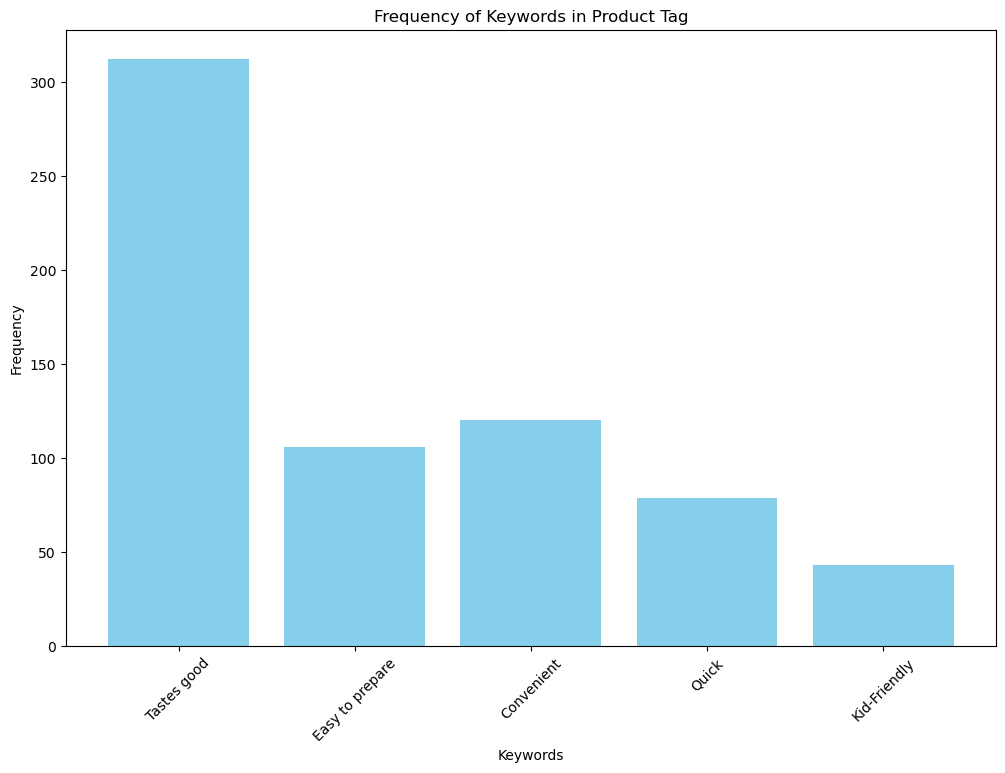

In [75]:

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming all_keywords is already extracted
keyword_counts = Counter(all_keywords)

# Create a DataFrame from the counts
keyword_df = pd.DataFrame.from_dict(keyword_counts, orient='index', columns=['Count']).reset_index()
keyword_df = keyword_df.rename(columns={'index': 'Keyword'})

# Plotting the keyword counts
plt.figure(figsize=(12, 8))
plt.bar(keyword_df['Keyword'], keyword_df['Count'], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Product Tag')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


# This code maps the values in the `ProductConsumption` column to new categories, counts the frequency of each mapped value, and then plots a bar chart to visualize the frequency distribution of these categories. The categories are ordered as specified, ensuring that all predefined categories are displayed in the chart, even if some categories have a count of zero.

C:\Users\imsha\AppData\Local\Temp\ipykernel_18440\1426248734.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['ProductConsumptionMapped'] = unique_df['ProductConsumption'].map(mapping)


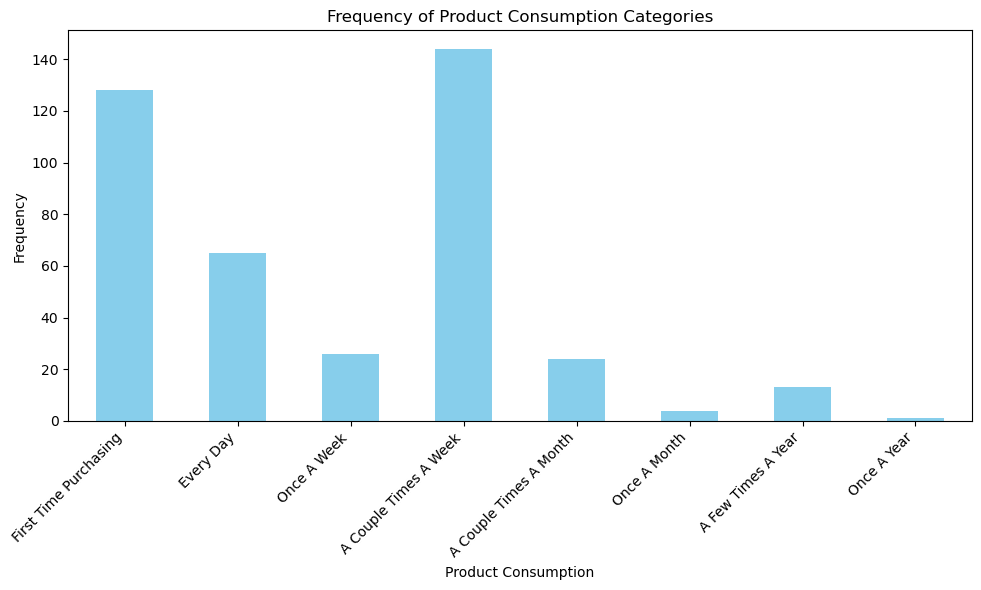

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Map the actual values to your desired categories
mapping = {
    'ThisIsMyFirstTimePurchasingThisProduct': 'First Time Purchasing',
    'EveryDay': 'Every Day',
    'OnceAWeek': 'Once A Week',
    'ACoupleTimesAWeek': 'A Couple Times A Week',
    'ACoupleTimesAMonth': 'A Couple Times A Month',
    'OnceAMonth': 'Once A Month',
    'AFewTimesAYear': 'A Few Times A Year',
    'OnceAYear': 'Once A Year'
}

# Apply the mapping to the 'ProductConsumption' column
unique_df['ProductConsumptionMapped'] = unique_df['ProductConsumption'].map(mapping)

# Now count the occurrences of the new mapped values
product_counts = unique_df['ProductConsumptionMapped'].value_counts()

# Define the order of the categories
order = [
    'First Time Purchasing',
    'Every Day',
    'Once A Week',
    'A Couple Times A Week',
    'A Couple Times A Month',
    'Once A Month',
    'A Few Times A Year',
    'Once A Year'
]

# Ensure all categories in 'order' are present in product_counts (add missing ones with count 0)
for category in order:
    if category not in product_counts:
        product_counts[category] = 0

# Reorder the categories according to 'order'
product_counts = product_counts[order]

# Plotting
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Product Consumption')
plt.ylabel('Frequency')
plt.title('Frequency of Product Consumption Categories')
plt.xticks(rotation=45, ha='right')  # Tilt labels to 45 degrees towards left
plt.tight_layout()
plt.show()


# This code visualizes the percentage distribution of the `IsRecommended` column in `unique_df`. It computes the percentage of reviews that are recommended versus those that are neutral or not recommended, and then creates a bar chart to display this data. The chart labels each bar with the corresponding percentage value and ensures the y-axis is scaled from 0% to 100%.

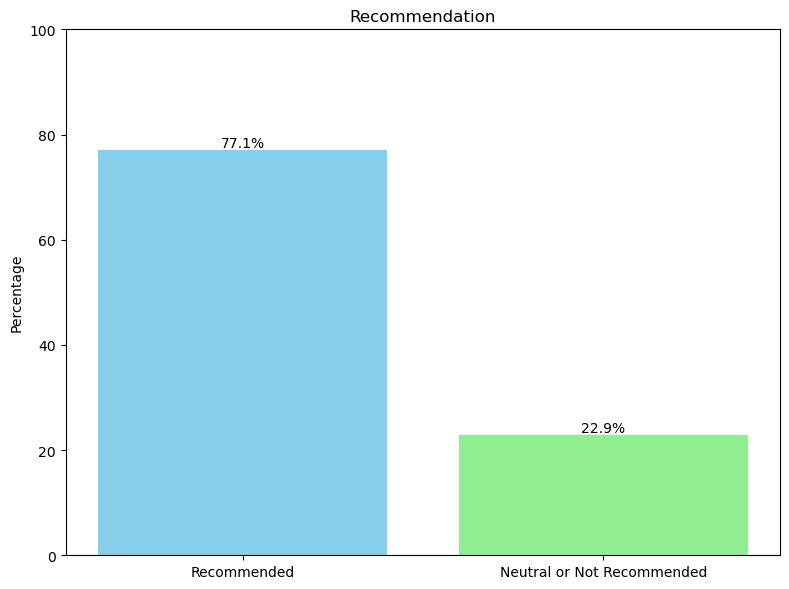

In [49]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data and computation)
age_counts = unique_df['IsRecommended'].value_counts()

# Rename index labels
age_counts.index = ['Recommended', 'Neutral or Not Recommended']

# Calculate percentages
total = age_counts.sum()
percentages = [(count / total) * 100 for count in age_counts]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(age_counts.index, percentages, color=['skyblue', 'lightgreen'])

# Adding percentages on top of bars
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percent:.1f}%', 
             ha='center', va='bottom')

# Adding labels and title
plt.ylabel('Percentage')
plt.title('Recommendation')

# Customizing y-axis to show percentages from 0% to 100%
plt.ylim(0, 100)

# Show plot
plt.tight_layout()
plt.show()


# This code visualizes the frequency distribution of age categories in `age_counts`, using a predefined custom order for the age groups. It creates a bar chart, where the x-axis represents the age categories (from `17orUnder` to `65orOver`), and the y-axis shows the frequency of each age group. The x-axis labels are not rotated for better readability.

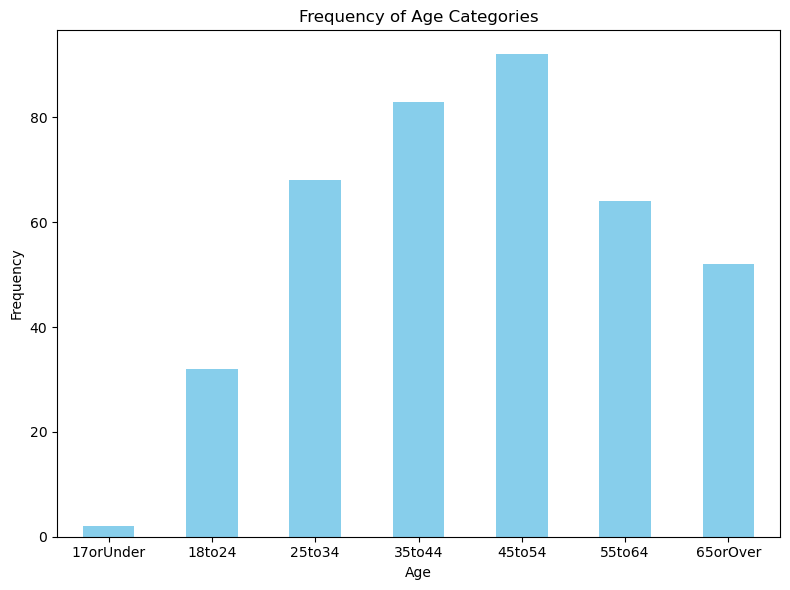

In [64]:
import matplotlib.pyplot as plt

# Define the custom order of age categories
age_order = ['17orUnder', '18to24', '25to34', '35to44', '45to54', '55to64', '65orOver']

# Reorder the age counts according to the defined order
age_counts = age_counts[age_order]

# Plotting the mode (most frequent age category)
plt.figure(figsize=(8, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Age Categories')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# This code generates two side-by-side bar charts to visualize the gender distribution in the `Gender` column of `unique_df`. The first plot shows the count of each gender (male and female), and the second plot displays the percentage distribution for each gender. The x-axis labels are not rotated for better readability, and the layout is adjusted to ensure that the labels fit properly.

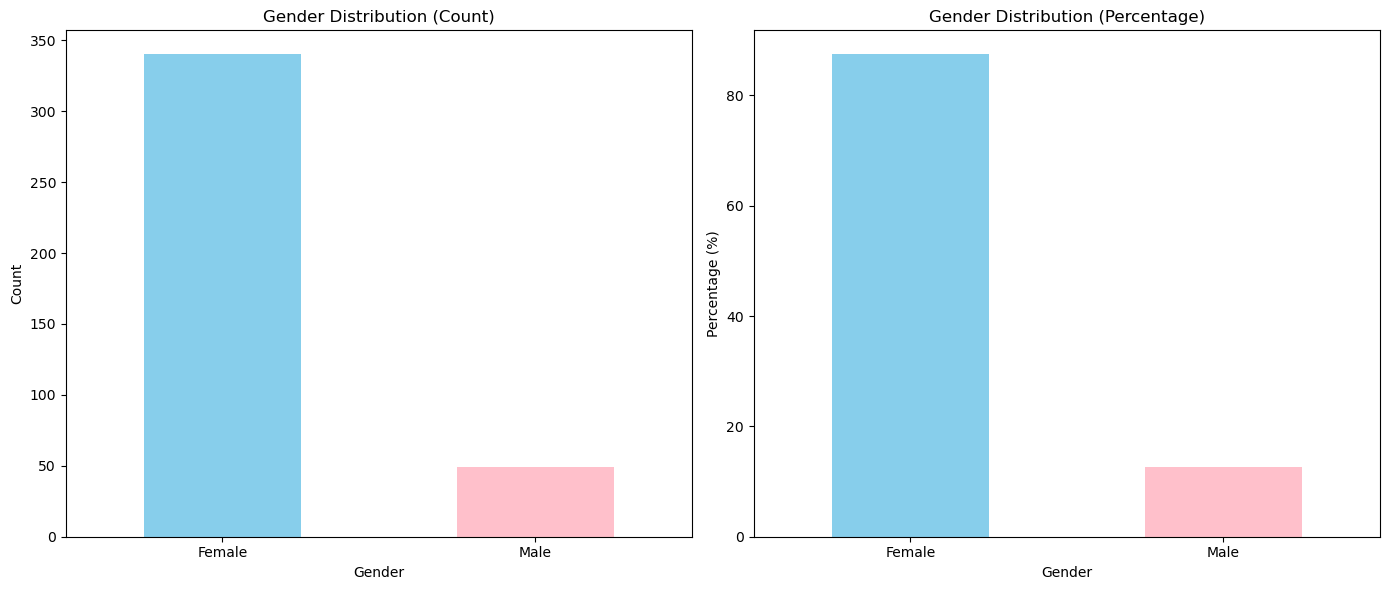

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of 'Female' and 'Male' in the 'Gender' column
gender_counts = unique_df['Gender'].value_counts()

# Calculate the percentage for each gender
gender_percentage = gender_counts / gender_counts.sum() * 100

# Create a side-by-side plot (2 subplots)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the count of males and females
gender_counts.plot(kind='bar', color=['skyblue', 'pink'], ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Gender Distribution (Count)')
axes[0].set_xticklabels(gender_counts.index, rotation=0)

# Plotting the percentage of males and females
gender_percentage.plot(kind='bar', color=['skyblue', 'pink'], ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_title('Gender Distribution (Percentage)')
axes[1].set_xticklabels(gender_percentage.index, rotation=0)

# Adjust the layout to make sure the labels fit
plt.tight_layout()
plt.show()


# This code filters the `unique_df` DataFrame to extract only the rows where the `ProductName` is "Just Like Mozzarella Shreds" and stores the result in a new DataFrame called `Just_Like_Mozzarella_Shreds_df`. It then prints the filtered DataFrame to display the relevant rows.

In [54]:
# Filter the DataFrame to get rows where 'ProductName' is 'Just Like Mozzarella Shreds'
Just_Like_Mozzarella_Shreds_df = unique_df[unique_df['ProductName'] == 'Just Like Mozzarella Shreds']

# Display the new filtered DataFrame
print(Just_Like_Mozzarella_Shreds_df)


            Id     ProductId                  ProductName      UserLocation  \
0    184910171  810934030208  Just Like Mozzarella Shreds       Phoenix, AZ   
2    338947838  810934030208  Just Like Mozzarella Shreds              None   
6    339419949  810934030208  Just Like Mozzarella Shreds   Chesterbrook PA   
7    187527610  810934030208  Just Like Mozzarella Shreds         Miami Fzl   
9    210526983  810934030208  Just Like Mozzarella Shreds       Norwich, NY   
..         ...           ...                          ...               ...   
311  170200581  810934030208  Just Like Mozzarella Shreds              None   
312  173089446  810934030208  Just Like Mozzarella Shreds              None   
313  269885310  810934030208  Just Like Mozzarella Shreds  Georgetown texas   
315  257081271  810934030208  Just Like Mozzarella Shreds  Colorado Springs   
316  271097767  810934030208  Just Like Mozzarella Shreds              None   

     Rating                                        

In [56]:
Just_Like_Mozzarella_Shreds_df['ReviewText']

0      Several years after getting diagnosis with a c...
2      Good mozzarella flavor from Violife Foods chee...
6      I just made pizza with the new ingredients. I ...
7      Violife Mozzarella and Cheddar shreds make gre...
9      I bought this last night because I wanted pizz...
                             ...                        
311    Melts amazing which is difficult to find in ve...
312    Excellent. The greatest flavor and melts so ea...
313    I eat violife dairy free cheese every day due ...
315    This is delicious! Better than real cheese! We...
316    Best vegan mozz shreds! Better than most brand...
Name: ReviewText, Length: 144, dtype: object

# This code performs sentiment analysis on the `ReviewText` column of the `Just_Like_Mozzarella_Shreds_df` DataFrame using the `SentimentIntensityAnalyzer` from the `vaderSentiment` library. It extracts the compound sentiment scores for each review, stores them in a dictionary, and then visualizes the distribution of these sentiment scores using a horizontal boxplot. The plot shows the range of sentiment scores for reviews related to "Just Like Mozzarella Shreds," with grid lines added for clarity.

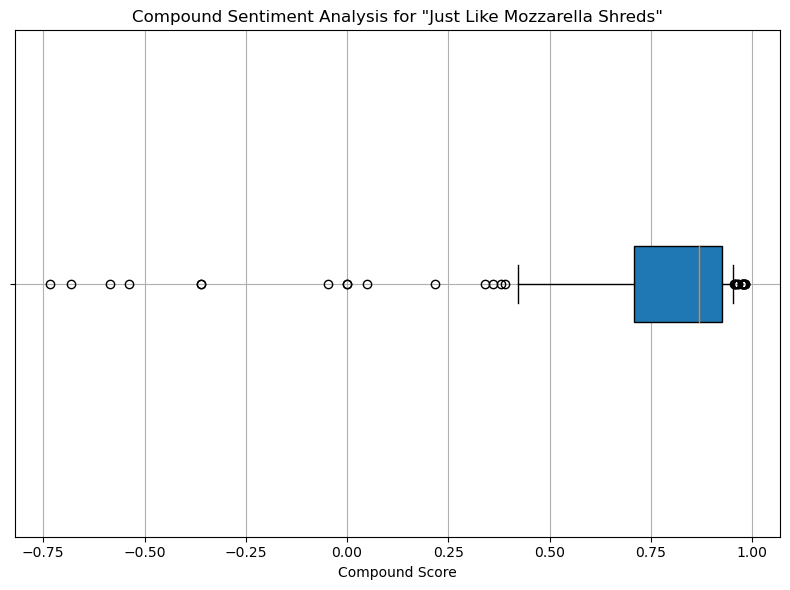

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize a dictionary to store sentiment results
sentiment_results = {}

# Iterate through each row in the 'ReviewText' column of Just_Like_Mozzarella_Shreds_df
for index, row in Just_Like_Mozzarella_Shreds_df.iterrows():
    comment = row['ReviewText']
    
    # Perform sentiment analysis on the review text
    sentiment_scores = analyzer.polarity_scores(comment)
    
    # Store the sentiment analysis result in the dictionary
    sentiment_results[f"Review_{index}"] = sentiment_scores

# Extract the compound sentiment scores into a list
compound_values = [scores['compound'] for scores in sentiment_results.values()]

# Create the boxplot
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.boxplot(compound_values, vert=False, patch_artist=True, whis=(10, 90))  # Set vert=False for horizontal plot

# Customize the plot
plt.title('Compound Sentiment Analysis for "Just Like Mozzarella Shreds"')
plt.xlabel('Compound Score')  # X-axis label for horizontal plot
plt.yticks([1], [''])  # Remove y-axis labels for a cleaner plot (optional)

# Show grid lines for better visualization
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()
